<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [266]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [267]:
# Open & Read SAT Scores File
path='sat_scores.csv'
raw_pd = ''
with open(path, 'r') as f:
    raw_pd = f.read()

In [268]:
# the string is assigned to the raw_pd variable
clean1 = raw_pd.splitlines()

# remove double quotes
clean2=[]
for rec in clean1:
    #print(rec)
    #rec=rec.replace('"', "'")  ##this is wrong!!!
    rec=rec.replace('"', "")
    #print(rec)
    #print('----------------')
    clean2.append(rec)

# split list 
clean3=[]
for rec in clean2:
    #print(rec)
    rec=rec.split(',')
    clean3.append(rec) 
    
# Check for null field values
for row in clean3:
    #print(row)
    for i in range(len(row)) :
        if row[i] == '':
            print(row[0], 'has null values')
            #row[i] = -1     

# convert numeric columns to float
for row in clean3:
#    print(row)
    for index in range(len(row)):
        #print(row[index])
        if row[index].isdigit() == True:
            row[index]=int(row[index])

sat_scores_list = clean3         

In [269]:
sat_scores_list[:6]

[['State', 'Rate', 'Verbal', 'Math'],
 ['CT', 82, 509, 510],
 ['NJ', 81, 499, 513],
 ['MA', 79, 511, 515],
 ['NY', 77, 495, 505],
 ['NH', 72, 520, 516]]

In [270]:

# Create Dictionary (Manual)
# This is a code snippet on how to load the formatted list to a dictionary
# to a whole dictionary.   

#OUTPUT:
#    {'CT': {'Rate': 82, 'Verbal': 509, 'Math': 510},
#     'NJ': {'Rate': 81, 'Verbal': 499, 'Math': 513},
#     'MA': {'Rate': 79, 'Verbal': 511, 'Math': 515},
#     ...
#    }

tmplist=sat_scores_list   ## extract 1 header and n detail records
tmplist2=[]               ## list whose 1st column is removed
tmplist3=[]               ## list of dictionary details
row_header=[]             ## list of dictionary header titles
list_keys=[]              ## list of dictionary keys

# remove 1st column in list
for row in tmplist:
    tmplist2.append(row[1:])

# use zip to create dictionary detail rows
row_header = tmplist2[0]   ## list of header titles
for row in tmplist2[1:]:    
    #pprint(row)
    tmplist3.append(dict(zip(row_header, row)))
        

# extract keys of detail recs
list_keys=[key[0] for key in tmplist[1:]]    ## list of keys of the detail records

# create dictionary from loaded csv data
tmp_dict={}
prev_keys=0
dupkey_cnt = 0  ### this will be used in case of  duplicate keys

for index in range(len(list_keys)):
    row_keys=list_keys[index]
    tmp_dict[row_keys]=tmplist3[index]
        

In [271]:
# Create Dictionary (Manual)
# This is a code snippet on how to load the formatted list to a dictionary
# to a whole dictionary.   

#OUTPUT:
#  {'State': ['CT', 'NJ', 'MA', 'NY', 'NH'...],
#   'Rate': [82, 81, 79, 77, 72...],
#   'Verbal': [509, 499, 511, 495, 520...],
#   'Math': [510, 513, 515, 505, 516...]}

header=sat_scores_list[0]
detail=sat_scores_list[1:]

tmp_dict={}
for index, column_name in enumerate(header):
    tmp_dict[column_name] = []
    for row in detail:
        tmp_dict[column_name].append(row[index])

sat_scores_dict = tmp_dict        

In [273]:
tmp_dict

In [274]:
from collections import OrderedDict

OrderedDict
list1=['State', 'Rate', 'Verbal', 'Math']
list2=['CT', 82, 509, 510]
list3=[['CT', 82, 509, 510],['NJ', 81, 499, 513]]

pprint(dict(zip(list1,list2)))
pprint(dict(zip(list1,list3)))

#tmplist1=dict(zip(list1,list2))
#tmplist1

tmplist={}
#for row in list3:
#    tmplist.update({list1[0]:row[0],list1[1]:row[1],list1[2]:row[2],list1[3]:row[3]})

#for idx in range(len(list3)):
#    print(list3[idx])
#    #tmplist.update(list1[0]:list3[idx][0], list1[1]:list3[idx][1], list1[2]:list3[idx][2], list1[3]:list3[idx][3])
#    tmplist.update({idx:{list1[0]:list3[idx][0], list1[1]:list3[idx][1], list1[2]:list3[idx][2], list1[3]:list3[idx][3] }})

for index, column_name in enumerate(list1):
    tmplist[column_name] = []
    for row in list3:
        tmplist[column_name].append(row[index])

#print('xxx:',list3[0])
pprint('--------------------')    
#pprint(tmplist)
for row in tmplist: pprint(row)
tmplist    

{'Math': 510, 'Rate': 82, 'State': 'CT', 'Verbal': 509}
{'Rate': ['NJ', 81, 499, 513], 'State': ['CT', 82, 509, 510]}
'--------------------'
'State'
'Rate'
'Verbal'
'Math'


{'State': ['CT', 'NJ'],
 'Rate': [82, 81],
 'Verbal': [509, 499],
 'Math': [510, 513]}

In [275]:
list1=['State', 'Rate', 'Verbal', 'Math']
list2=['CT', 82, 509, 510]

pprint([dict(zip(list1,list2))])
#pprint(dict([zip(list1,list2)]))
pprint(list(zip(list1,list2)))

[{'Math': 510, 'Rate': 82, 'State': 'CT', 'Verbal': 509}]
[('State', 'CT'), ('Rate', 82), ('Verbal', 509), ('Math', 510)]


In [276]:
sat_scores_dict = tmp_dict

#========================================#
# sat_scores_dict is the final result
#========================================#

In [277]:
pprint(row_header)
#pprint(tmplist[:4])
pprint('------------------')
pprint(tmplist2[:4])
pprint('------------------')
pprint(tmplist3[:4])
pprint('------------------')
#pprint(sat_scores_dict['CT'])
#for key in sat_scores_dict: print(row)


['Rate', 'Verbal', 'Math']
'------------------'
[['Rate', 'Verbal', 'Math'], [82, 509, 510], [81, 499, 513], [79, 511, 515]]
'------------------'
[{'Math': 510, 'Rate': 82, 'Verbal': 509},
 {'Math': 513, 'Rate': 81, 'Verbal': 499},
 {'Math': 515, 'Rate': 79, 'Verbal': 511},
 {'Math': 505, 'Rate': 77, 'Verbal': 495}]
'------------------'


In [278]:
sat_scores_dict.keys()

dict_keys(['State', 'Rate', 'Verbal', 'Math'])

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [279]:
# Create DataFrame via SAT dictionary
sat_dict=pd.DataFrame.from_dict(sat_scores_dict)

In [280]:
# Create DataFrame via .read_csv()  
sat_csv = pd.read_csv('sat_scores.csv', encoding='latin-1')

In [281]:
pprint(sat_dict.head(6))
pprint('--------------------------')
pprint(sat_csv.head(6))

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
'--------------------------'
  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [282]:
pprint(sat_dict.info())
pprint('--------------------------')
pprint(sat_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None
'--------------------------'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB
None


### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [283]:
sat_csv.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [284]:
My_Answer='''

### Data Dictionary
State  : 2 alpha characters ; valid state accronym
Rate   : Participation rate in a state; percentage
Verbal : Mean Verbal Scores in a state
Math   : Mean Math Scores in a state

'''

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [285]:
# ******************************
# Pull out Rate of Participation
# ******************************

sat_rate = sat_csv['Rate'].values
sat_rate_mean = np.mean(sat_rate)
sat_rate_std = np.std(sat_rate)
print('SAT Rate:')
print('mean: {}'.format(sat_rate_mean))
print('std: {}'.format(sat_rate_std))
print()

#standardize Rate of Participation
print('Standardized Rate of Participation')
sat_rate_stand = (sat_rate - sat_rate_mean) / sat_rate_std
print('mean: {}'.format(np.mean(sat_rate_stand)))
print('std: {}'.format(np.std(sat_rate_stand)))

#sat_rate

SAT Rate:
mean: 37.15384615384615
std: 27.037996494523586

Standardized Rate of Participation
mean: 3.3093186310942166e-17
std: 1.0


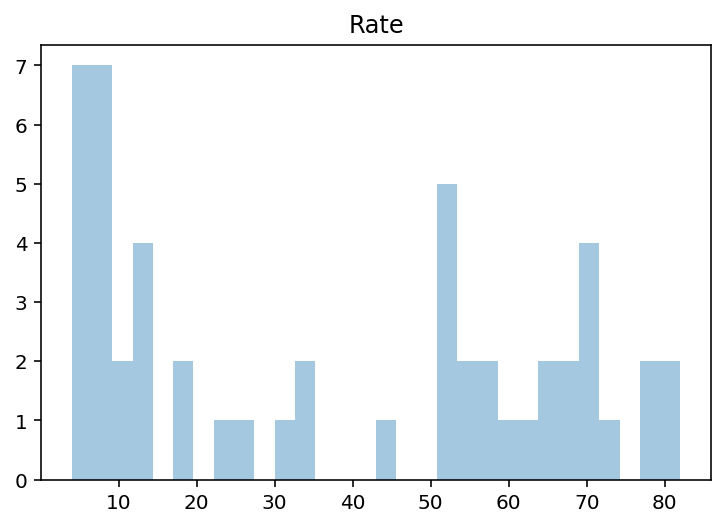

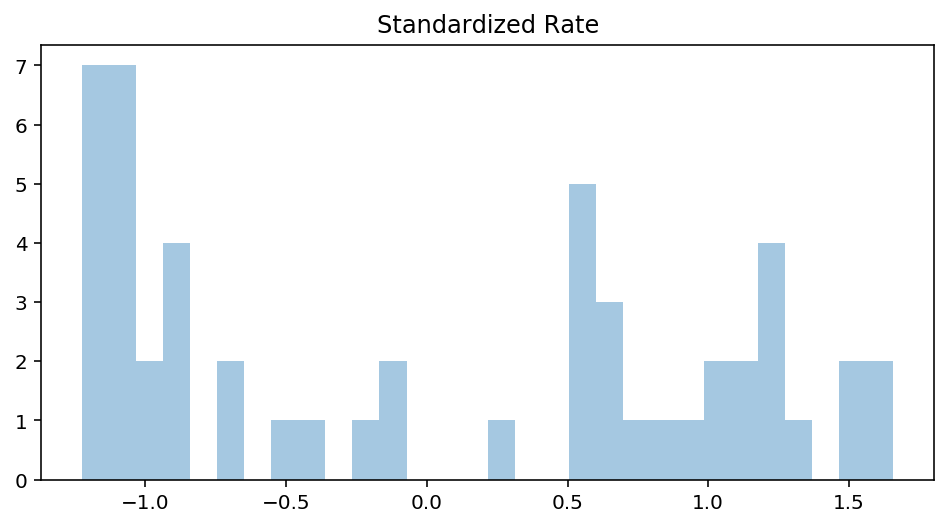

In [286]:
# Rate 
sns.distplot(sat_rate, bins=30, kde=False)
plt.title('Rate')
plt.show()


#======================================
# Standardized Rate
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(sat_rate_stand, bins=30, kde=False)
plt.title('Standardized Rate')
plt.show()

In [287]:
# ***********************
# Pull out MATH
# ***********************

math_rate = sat_csv['Math'].values
math_rate_mean = np.mean(math_rate)
math_rate_std = np.std(math_rate)
print('MATH Rate:')
print('mean: {}'.format(math_rate_mean))
print('std: {}'.format(math_rate_std))
print()

#standardize Math
print('Standardized Rate of MATH')
math_rate_stand = (math_rate - math_rate_mean) / math_rate_std
print('mean: {}'.format(np.mean(math_rate_stand)))
print('std: {}'.format(np.std(math_rate_stand)))

MATH Rate:
mean: 531.5
std: 35.66699616430595

Standardized Rate of MATH
mean: -1.0675221390626506e-18
std: 1.0


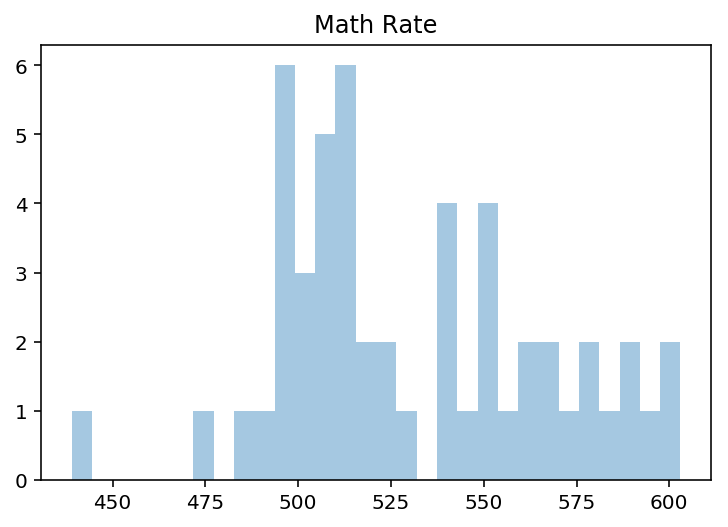

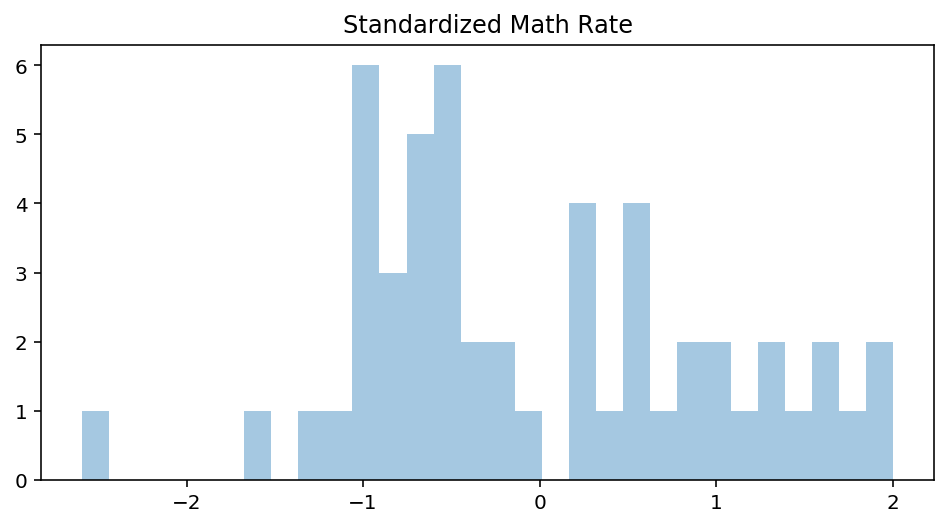

In [288]:
# Math
sns.distplot(math_rate, bins=30, kde=False)
plt.title('Math Rate')
plt.show()


# Standardized Math
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(math_rate_stand, bins=30, kde=False)
plt.title('Standardized Math Rate')
plt.show()

In [289]:
# ***********************
# Pull out VERBAL
# ***********************

verbal_rate = sat_csv['Verbal'].values
verbal_rate_mean = np.mean(verbal_rate)
verbal_rate_std = np.std(verbal_rate)
print('VERBAL Rate:')
print('mean: {}'.format(verbal_rate_mean))
print('std: {}'.format(verbal_rate_std))
print()

# standardize VERBAL
print('Standardized Rate of VERBAL')
verbal_rate_stand = (verbal_rate - verbal_rate_mean) / verbal_rate_std
print('mean: {}'.format(np.mean(verbal_rate_stand)))
print('std: {}'.format(np.std(verbal_rate_stand)))

VERBAL Rate:
mean: 532.0192307692307
std: 32.915094961603266

Standardized Rate of VERBAL
mean: 1.609823385706477e-15
std: 1.0


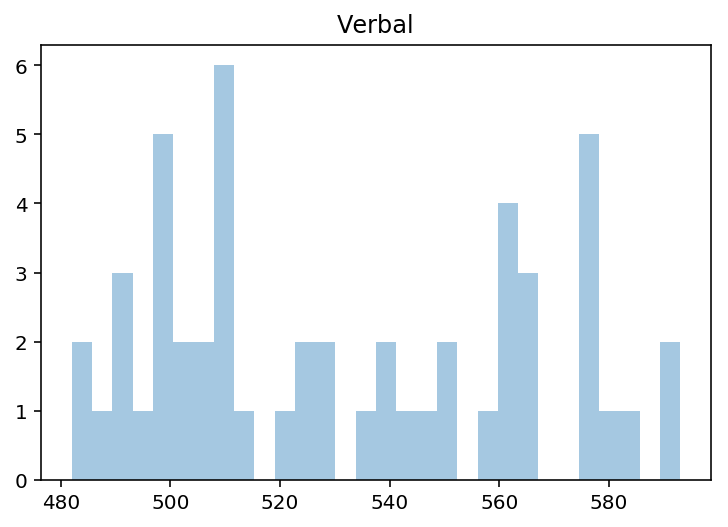

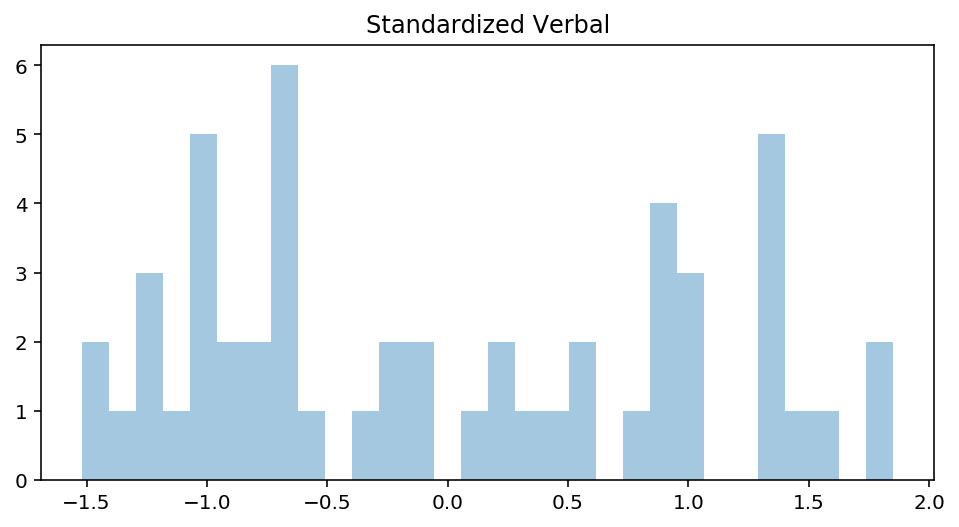

In [290]:
# Verbal
sns.distplot(verbal_rate, bins=30, kde=False)
plt.title('Verbal')
plt.show()


# Standardized Verbal
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(verbal_rate_stand, bins=30, kde=False)
plt.title('Standardized Verbal')
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

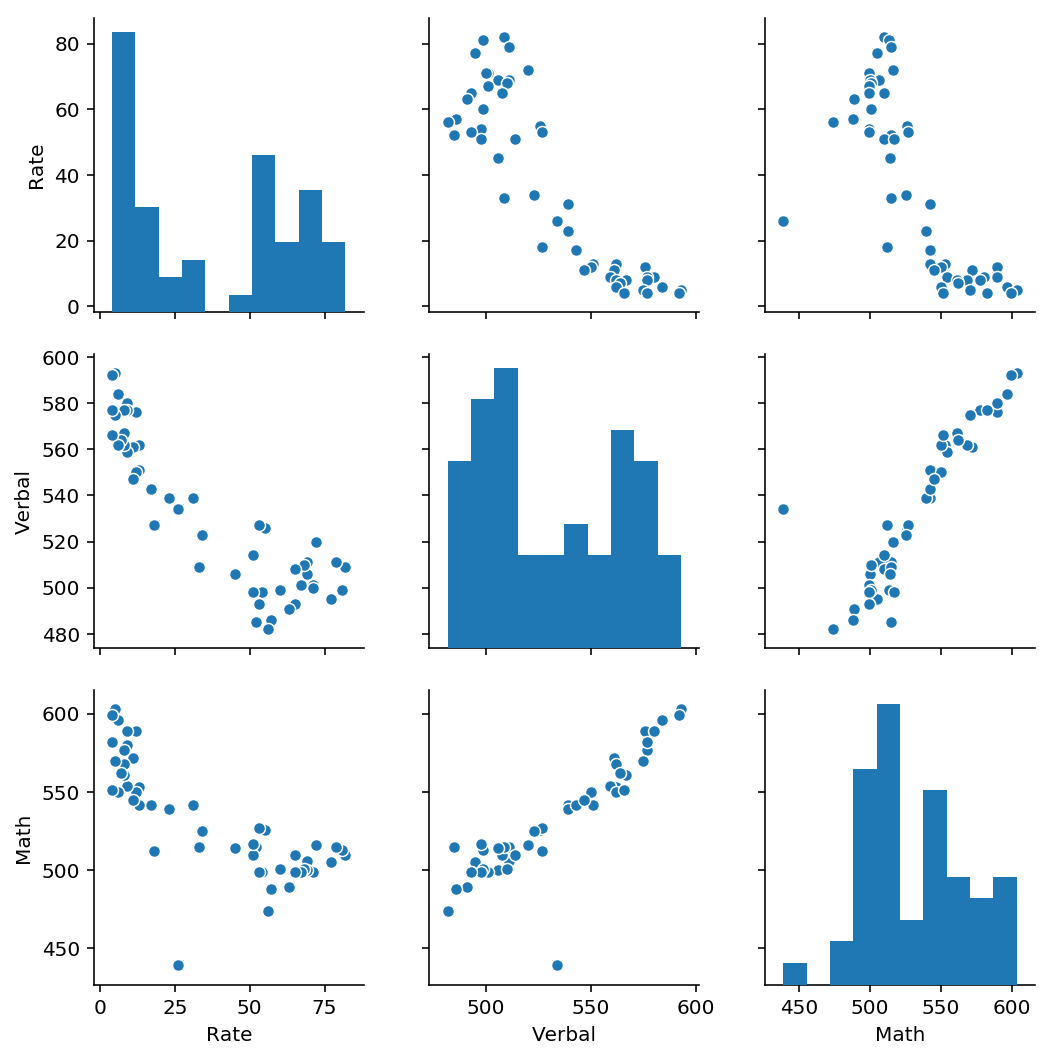

In [291]:
### Plotting a pairplot  
sns.pairplot(data=sat_csv)  

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

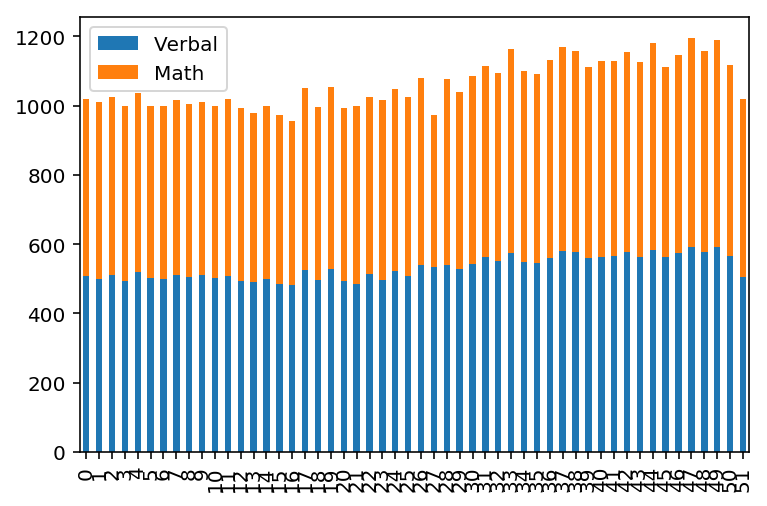

In [292]:
df=sat_csv[sat_csv.columns[2:4]]
df.plot.bar(stacked=True);

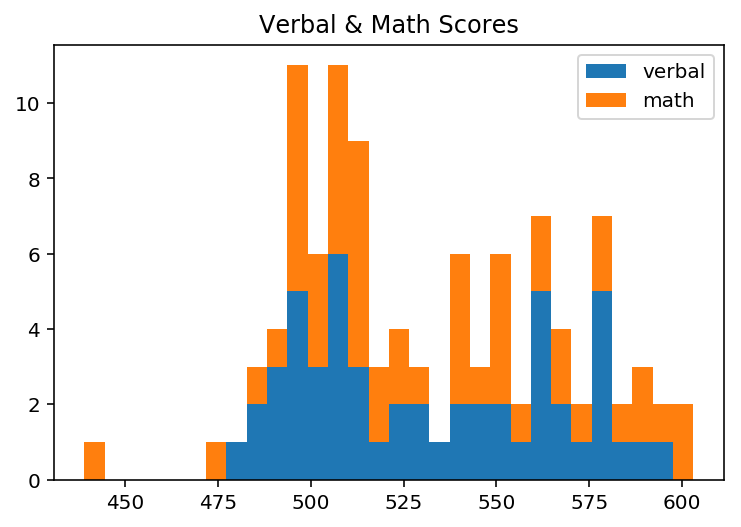

In [293]:
n_bins=30
mylabel = ['verbal', 'math']
df=sat_csv[sat_csv.columns[2:4]]
df_verbal=sat_csv[sat_csv.columns[2]]
df_math=sat_csv[sat_csv.columns[3]]

#-------------------------
plt.hist([df_verbal,df_math], n_bins, histtype='bar', label=mylabel, stacked=True)
plt.legend(loc="upper right")
plt.title('Verbal & Math Scores')
plt.show()

#plt.hist(np.random.normal(size=10000), bins=100)

In [294]:
# this is just to sort and view the max values of Verbal and math
print(df.sort_values(by='Verbal', ascending=False).head())
print()
print(df.sort_values(by='Math', ascending=True).head())

print()
print(df.head(6))

print('---------------------------')
#print(df_verbal[:6])
print('---------------------------')
#print(df_math[:6])

df.groupby(['Verbal'])\
   .size()\
   .sort_values(ascending=False)

    Verbal  Math
47     593   603
49     592   599
44     584   596
37     580   589
42     577   577

    Verbal  Math
27     534   439
16     482   474
15     486   488
13     491   489
20     493   499

   Verbal  Math
0     509   510
1     499   513
2     511   515
3     495   505
4     520   516
5     501   499
---------------------------
---------------------------


Verbal
562    3
577    3
499    2
511    2
539    2
509    2
506    2
501    2
527    2
498    2
493    2
523    1
500    1
495    1
508    1
491    1
510    1
486    1
485    1
514    1
520    1
593    1
526    1
564    1
584    1
580    1
576    1
575    1
567    1
566    1
561    1
592    1
559    1
551    1
550    1
547    1
543    1
534    1
482    1
dtype: int64

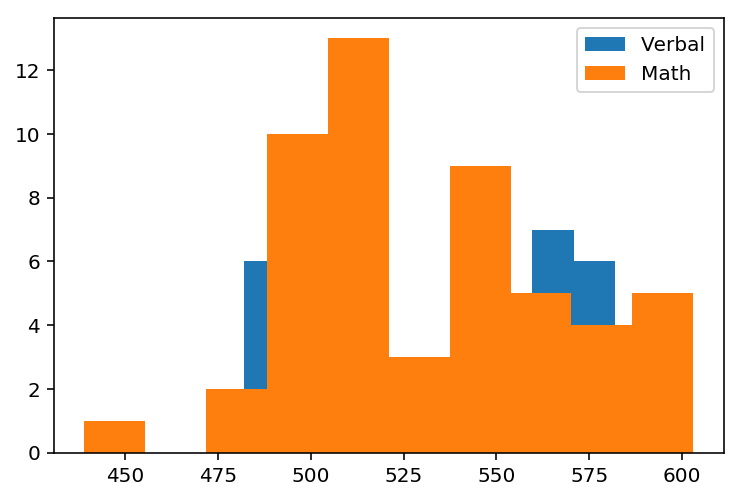

In [295]:
plt.hist(df_verbal, label='Verbal', stacked=True)
plt.hist(df_math, label='Math', stacked=True)
plt.legend(loc='upper right')
plt.savefig('temp.png')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

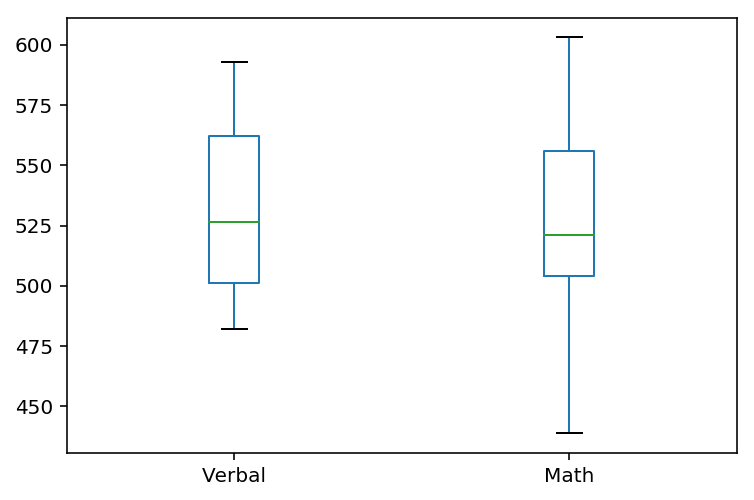

In [296]:
df=sat_csv[sat_csv.columns[2:4]]
df.plot.box()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


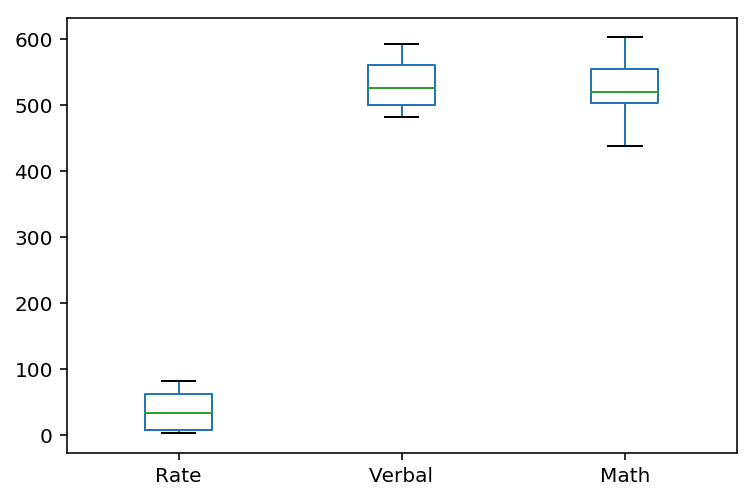

In [297]:
df=sat_csv
df.plot.box()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [298]:
print('mean(Verbal Scores):', np.mean(sat_csv['Verbal']))
#sat_csv[sat_csv['Verbal'] > np.mean(sat_csv['Verbal'])]

sat_csv.loc[:,['State','Verbal']][sat_csv['Verbal'] > np.mean(sat_csv['Verbal'])]

mean(Verbal Scores): 532.0192307692307


,State,Verbal
26,CO,539
27,OH,534
28,MT,539
30,ID,543
31,TN,562
32,NM,551
33,IL,576
34,KY,550
35,WY,547
36,MI,561


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [299]:
print('median(Verbal Scores):', np.median(sat_csv['Verbal']))
sat_csv.loc[:,['State','Verbal']][sat_csv['Verbal'] > np.median(sat_csv['Verbal'])]

median(Verbal Scores): 526.5


,State,Verbal
19,WA,527
26,CO,539
27,OH,534
28,MT,539
29,WV,527
30,ID,543
31,TN,562
32,NM,551
33,IL,576
34,KY,550


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [303]:
df=sat_csv
idx = 4

new_col = list(df['Verbal']-df['Math'])  # can be a list, a Series, an array or a scalar 
df.insert(loc=idx, column='Verbal_less_Math', value=new_col)


In [304]:
# drop a column (If you want to insert Verbal_less_Math column, run this box first to remove column)
#
#df.drop('Verbal_less_Math', axis=1, inplace=True)

In [306]:
df.columns
df.head(6)
sat_csv.head(6)

,State,Rate,Verbal,Math,Verbal_less_Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [307]:
sat_csv_Verbal = sat_csv[sat_csv['Verbal_less_Math'] >= 0] \
    .sort_values(by=['Verbal_less_Math','State'], ascending=False)

sat_csv_Verbal.head(3)

,State,Rate,Verbal,Math,Verbal_less_Math
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [308]:
sat_csv_Math = sat_csv[sat_csv['Verbal_less_Math'] < 0] \
    .sort_values(by=['Verbal_less_Math','State'], ascending=True)
sat_csv_Math.head(3)

,State,Rate,Verbal,Math,Verbal_less_Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


In [90]:
#sat_csv_Verbal.groupby(['Verbal_less_Math'])\
#   .size()\
#   .sort_values(ascending=False)\   

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [309]:
# This Correlation Matrix tells me that 
#
# - Verbal has a higher correlation to Rate Column as compared to Math.
# - Math has a higher correlation to Verbal Column as compared to Rate.

sat_csv.corr()

,Rate,Verbal,Math,Verbal_less_Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal_less_Math,-0.101412,0.052600,-0.388219,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [310]:
sat_csv.describe()

#  Results:
#   count - Number of elements of a particular column
#   mean  - mean or average of a particular column
#   std   - Standard Deviation of a particular column
#   min   - Minimum value found in a particular column
#   25%   - Lower Percentile of a particular column
#   50%   - Middle Percentile of a particular column (same as median)
#   75%   - Upper Percentile of a particular column
#   max   - Maximum value found in a particular column


,Rate,Verbal,Math,Verbal_less_Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [441]:
# Create DataFrame via .read_csv()  
drugs = pd.read_csv('drug-use-by-age.csv', encoding='latin-1')

In [442]:
drugs.info()
#drugs.head(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [444]:
print(drugs.columns)

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')


In [445]:
# based on .info(), there were no columns with null values.
# e.g. cocaine-frequency          17 non-null object

# However, based on .info(), columns with questionable values are:
#   cocaine-frequency, crack-frequency, heroin-frequency, 
#   inhalant-frequency, oxycontin-frequency & meth-frequency 

# strings values were found in the columns (e.g. '-')
# thus, we search for these values in columns
# for this example we find this string value in 
# 'cocaine-frequency' column:

print(drugs['cocaine-frequency'].unique())
print()

['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-']



In [316]:
#   We search all rows that contain these string values:

drugs[(drugs['cocaine-frequency'] == '-') | (drugs['crack-frequency'] == '-') |
      (drugs['heroin-frequency'] == '-') | (drugs['inhalant-frequency'] == '-') |
      (drugs['oxycontin-frequency'] == '-') | (drugs['meth-frequency'] == '-')   
     ]


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [446]:
#   We replace all '-' with 0 values
drugs=drugs.replace('-', '0')

In [455]:
#   We convert field with string values into float64 type
drugs['cocaine-frequency']   = drugs['cocaine-frequency'].astype('float64')
drugs['crack-frequency']     = drugs['crack-frequency'].astype('float64')
drugs['heroin-frequency']    = drugs['heroin-frequency'].astype('float64')
drugs['inhalant-frequency']  = drugs['inhalant-frequency'].astype('float64')
drugs['oxycontin-frequency'] = drugs['oxycontin-frequency'].astype('float64')
drugs['meth-frequency']      = drugs['meth-frequency'].astype('float64')

In [456]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [457]:
drugs.head(6)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5


In [328]:
# relationships:
'''
relationships:
1. age vs frequency
    a) max age per frequency
    b) percentage
    
2. age vs alcohol use and n

3. group following ages into 3 ranges
     a) teens (ages 12-19)
     b) adult (ages 20-34)
     c) midlife (ages 35 and above)
'''
print()
#drugs.dtypes

In [511]:
df=drugs
df.head(6)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,alcohol-use-n
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0,109.122
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,234.345
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,505.352
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,863.152
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,1226.258
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,1497.734


In [527]:
# Create column to show actual population of alcohol users
df['alcohol-use-n'] = (df['n']/100) * df['alcohol-use']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D5A1D053C8>]],
      dtype=object)

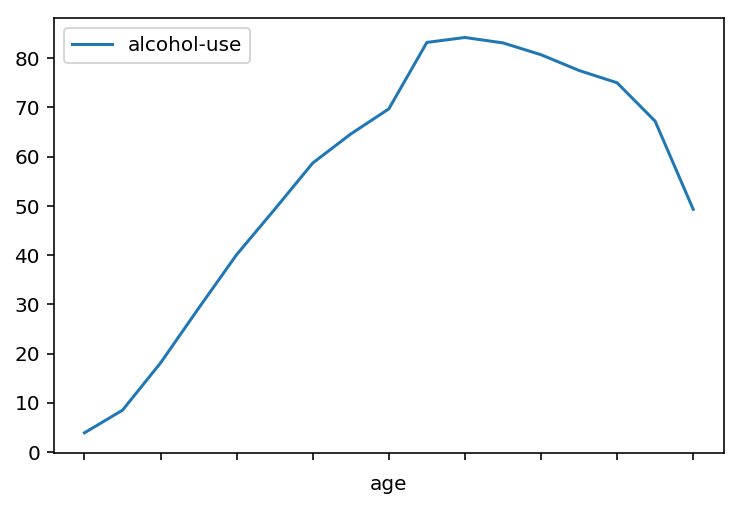

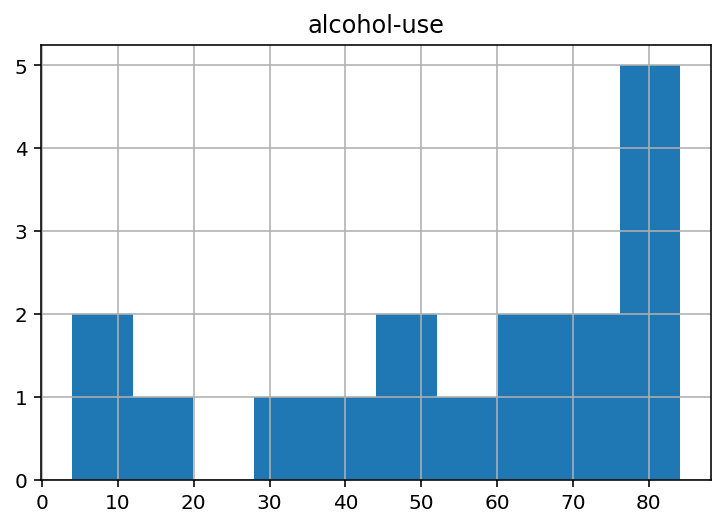

In [521]:
# Data shows that for alcohol, 

#df[['age','n','alcohol-use','alcohol-use-n']].sort_values(by=['alcohol-use-n','n'],ascending=False)

df[['age','n','alcohol-use','alcohol-use-n']].sort_values(by=['alcohol-use','n'],ascending=False)


df.plot(x='age',y='alcohol-use')

df.hist(['age','alcohol-use'])

In [365]:
print('Top 5 Highest Percentage of Alcohol Use')
print(df[['age','n','alcohol-use','alcohol-frequency']].sort_values(by=['alcohol-use','n'],ascending=False).head(5))

print()
print('Top 5 Lowest Percentage of Alcohol Use')
print(df[['age','n','alcohol-use','alcohol-frequency']].sort_values(by=['alcohol-use','n'],ascending=True).head(5))

Top 5 Highest Percentage of Alcohol Use
      age     n  alcohol-use  alcohol-frequency
10  22-23  4707         84.2               52.0
9      21  2354         83.2               52.0
11  24-25  4591         83.1               52.0
12  26-29  2628         80.7               52.0
13  30-34  2864         77.5               52.0

Top 5 Lowest Percentage of Alcohol Use
  age     n  alcohol-use  alcohol-frequency
0  12  2798          3.9                3.0
1  13  2757          8.5                6.0
2  14  2792         18.1                5.0
3  15  2956         29.2                6.0
4  16  3058         40.1               10.0


In [528]:
df.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency', 'alcohol-use-n'],
      dtype='object')

In [529]:
df_use= df[['age','n','alcohol-use','alcohol-use-n','marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use','oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']]
df_use.describe()

,n,alcohol-use,alcohol-use-n,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,1903.995294,18.923529,2.176471,0.294118,0.352941,3.394118,1.388235,6.270588,0.935294,2.805882,1.917647,0.382353,0.282353
std,1297.890426,26.878866,1425.463192,11.959752,1.816772,0.235772,0.333762,2.792506,0.927283,3.166379,0.608216,1.753379,1.407673,0.262762,0.138000
min,2223.000000,3.900000,109.122000,1.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.600000,0.000000,0.200000,0.000000,0.000000,0.000000
25%,2469.000000,40.100000,1206.864000,8.700000,0.500000,0.000000,0.100000,0.600000,0.600000,3.900000,0.400000,1.400000,0.600000,0.200000,0.200000
50%,2798.000000,64.600000,1497.734000,20.800000,2.000000,0.400000,0.200000,3.200000,1.400000,6.200000,1.100000,3.500000,1.800000,0.400000,0.300000
75%,3058.000000,77.500000,2219.600000,28.400000,4.000000,0.500000,0.600000,5.200000,2.000000,9.000000,1.400000,4.200000,3.000000,0.600000,0.400000
max,7391.000000,84.200000,5543.250000,34.000000,4.900000,0.600000,1.100000,8.600000,3.000000,10.000000,1.700000,5.400000,4.100000,0.900000,0.500000


In [530]:
df_use

,age,n,alcohol-use,alcohol-use-n,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,2798,3.9,109.122,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,2757,8.5,234.345,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,2792,18.1,505.352,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,2956,29.2,863.152,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,3058,40.1,1226.258,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2
5,17,3038,49.3,1497.734,28.0,2.0,0.1,0.1,4.8,2.0,8.5,1.4,3.5,2.8,0.6,0.5
6,18,2469,58.7,1449.303,33.7,3.2,0.4,0.4,7.0,1.8,9.2,1.7,4.9,3.0,0.5,0.4
7,19,2223,64.6,1436.058,33.4,4.1,0.5,0.5,8.6,1.4,9.4,1.5,4.2,3.3,0.4,0.3
8,20,2271,69.7,1582.887,34.0,4.9,0.6,0.9,7.4,1.5,10.0,1.7,5.4,4.0,0.9,0.5
9,21,2354,83.2,1958.528,33.0,4.8,0.5,0.6,6.3,1.4,9.0,1.3,3.9,4.1,0.6,0.3


In [566]:
df_alcohol=df[['age','n','alcohol-use','alcohol-use-n','alcohol-frequency']]

np.mean(df_alcohol['n'])
df_alcohol
#df_alcohol['alcohol-mean'] = np.mean(df_alcohol['n'])


,age,n,alcohol-use,alcohol-use-n,alcohol-frequency
0,12,2798,3.9,109.122,3.0
1,13,2757,8.5,234.345,6.0
2,14,2792,18.1,505.352,5.0
3,15,2956,29.2,863.152,6.0
4,16,3058,40.1,1226.258,10.0
5,17,3038,49.3,1497.734,13.0
6,18,2469,58.7,1449.303,24.0
7,19,2223,64.6,1436.058,36.0
8,20,2271,69.7,1582.887,48.0
9,21,2354,83.2,1958.528,52.0


In [545]:
# Split groups into teens, adults, midlife
df_teens=df_use.iloc[0:8]
df_adult=df_use.iloc[[8,9,10,11,12,13]]
df_midlife=df_use.iloc[[14,15,16]]

df_teens.describe()
df_adult.sum()

age                  202122-2324-2526-2930-34
n                                       19415
alcohol-use                             478.4
alcohol-use-n                         15660.2
marijuana-use                           157.5
cocaine-use                              23.5
crack-use                                   3
heroin-use                                4.3
hallucinogen-use                         28.4
inhalant-use                              5.7
pain-releiver-use                        52.2
oxycontin-use                             8.1
tranquilizer-use                         25.8
stimulant-use                              18
meth-use                                  3.8
sedative-use                                2
dtype: object

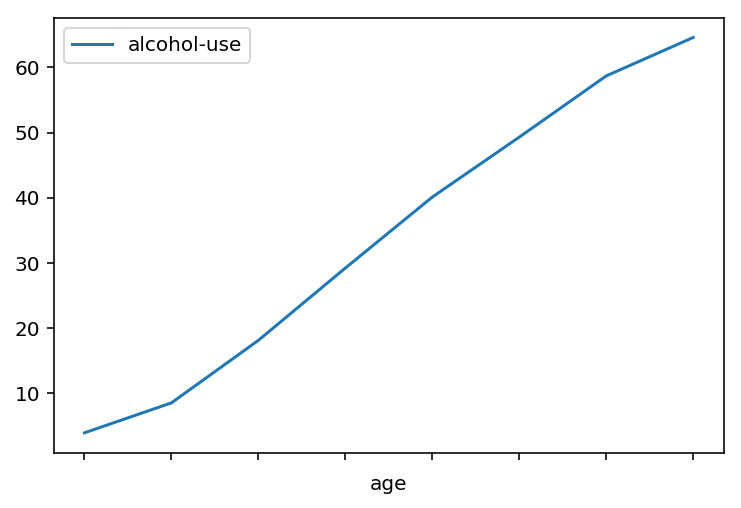

In [554]:
#df_teens.hist(['alcohol-use-n'], bins=5)

#histo_survived = df.groupby('Survived').hist(column='Age', sharex=True, sharey=True)
#plt.title("Alcohol Use Teens")
#plt.xlabel("Age")
#plt.ylabel("Alcohol")

df_teens.plot(x='age',y='alcohol-use')

#df_teens['alcohol-use'].hist(bins=20)

#ax = df_teens['alcohol-use-n'].hist(bins=20)
#ax.set_title('Alcohol Use');

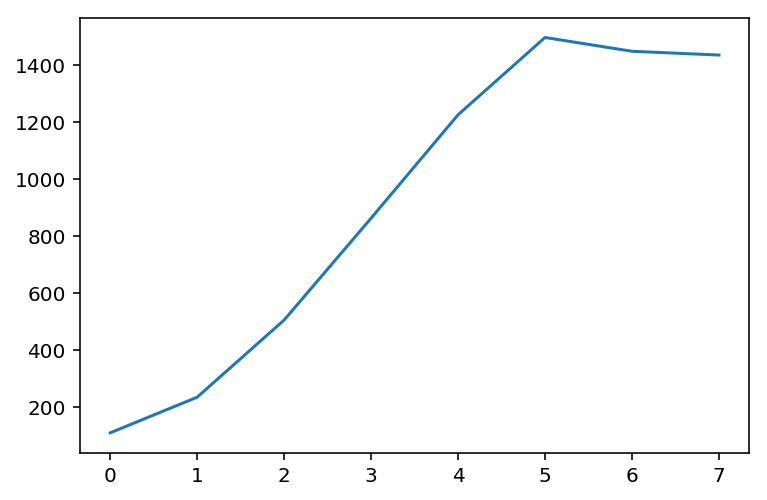

In [547]:
df_teens['alcohol-use-n'].plot()

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [ ]:
#Write a specific question you would like to answer with the data (that can be accomplished with EDA).

Q: Does increase of alcohol consumption affect marijuana consumption ? 

In [ ]:
#Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
1. Comparison of alcohol against marijuana consuption and test this against certain groups.


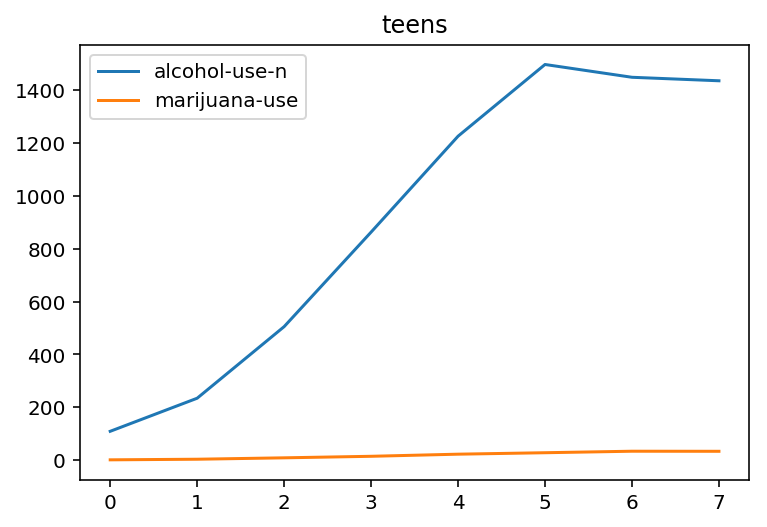

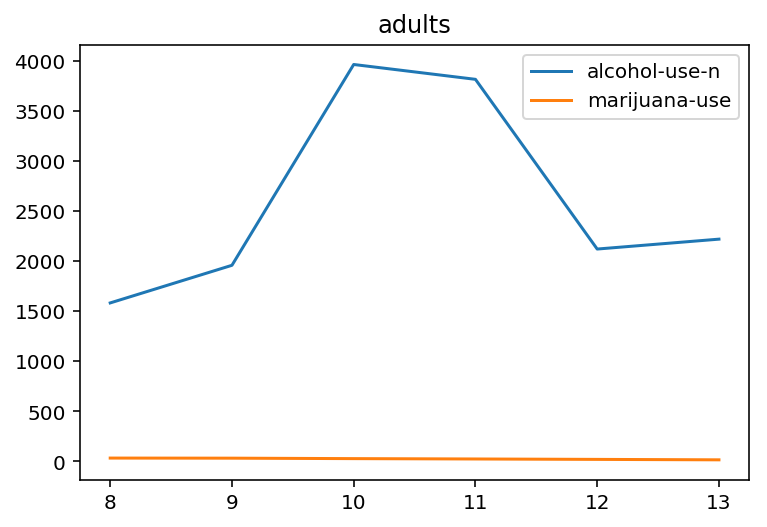

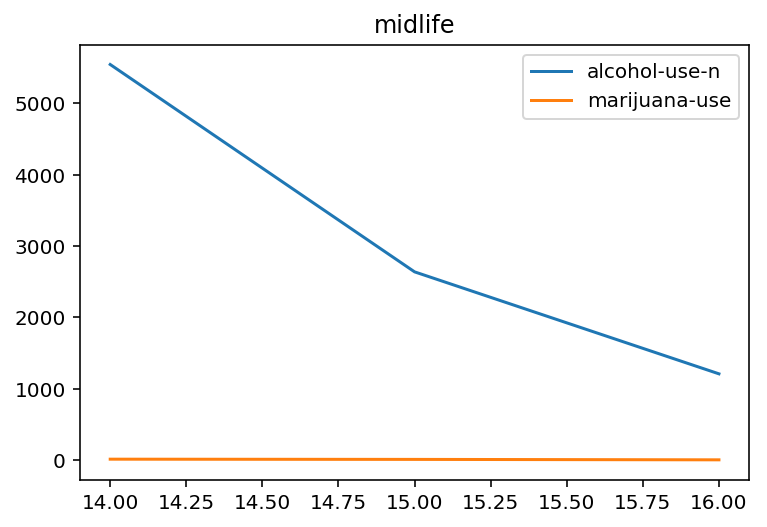

In [605]:
#Use EDA techniques of your choice, numeric and/or visual, to look into your question.

df_teens[['alcohol-use-n','marijuana-use']].plot(title='teens')
df_adult[['alcohol-use-n','marijuana-use']].plot(title='adults')
df_midlife[['alcohol-use-n','marijuana-use']].plot(title='midlife')

In [604]:
df_alcohol.head(6)

,age,n,alcohol-use,alcohol-use-n,alcohol-frequency
0,12,2798,3.9,109.122,3.0
1,13,2757,8.5,234.345,6.0
2,14,2792,18.1,505.352,5.0
3,15,2956,29.2,863.152,6.0
4,16,3058,40.1,1226.258,10.0
5,17,3038,49.3,1497.734,13.0


In [ ]:
#Write up your report on what you have found regarding the hypothesis about the data you came up with.

Based on the EDA scripts, 
we grouped our data by age range (teens, adults, midlife and beyond)
1. For alcohol consumption:
    - For teens, it is expected that older teens have higher consumption since teens 
    like to experiment with vices in older years
    - For Adults, those in the middle brakce have higher consumption.
    - For Midlife, alcohol consumption tends to drop the more you get older and more mature.
    
2.  In spite of differnt trends of spikes in consumption of alcohol, 
    the pace of marijuana consumption is steady... thus based on the EDA
    above, there is little or no increase of alcohol consumption and affect marijuana consumption 
    for teens is little if none. 


**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.